In [101]:
import xarray as xr
import matplotlib.pyplot as plt
import dedalus.public as d3

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22})
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors

import sys
sys.path.insert(0, '/home/disk/eos7/sressel/research/thesis-work/python/auxiliary_functions/')
import ipynb.fs.full.mjo_mean_state_diagnostics as mjo
from ipynb.fs.full.bmh_colors import bmh_colors
from ipynb.fs.full.rounding_functions import round_out, round_to_multiple
from ipynb.fs.full.modified_colormap import Ahmed21_colormap
Ahmed_cmap = Ahmed21_colormap()

In [88]:
# u_velocity = d3.load_tasks_to_xarray('advection_snapshots/advection_snapshots_s1.h5')
data = d3.load_tasks_to_xarray('snapshots/snapshots_s1.h5')
zonal_velocity = data['zonal_velocity']
column_temperature = data['column_temperature']

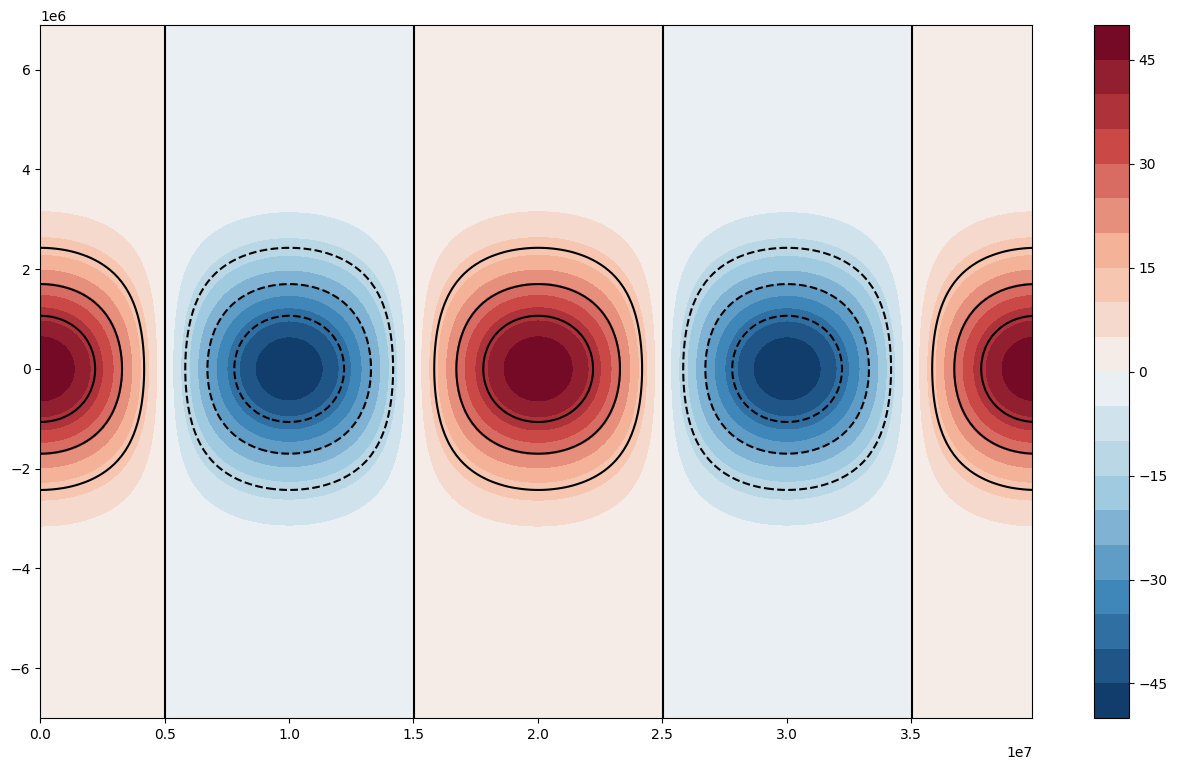

In [103]:
plt.style.use('default')
plt.figure(figsize=(16,9))
plt.contourf(
    zonal_velocity.x,
    zonal_velocity.y,
    zonal_velocity.T.isel(t=0),
    cmap = Ahmed_cmap,
    norm=mcolors.CenteredNorm(vcenter=0),
    levels=21
)
plt.colorbar()

plt.contour(
    column_temperature.x,
    column_temperature.y,
    column_temperature.T.isel(t=0),
    colors='k'
)

In [116]:
ncc_y = dist.Field(bases=ybasis)
# ncc_y.meta['x']['constant'] = True
ncc_y['g'] = y

In [117]:
ncc_y['g']

array([[-7000000., -6890625., -6781250., -6671875., -6562500., -6453125.,
        -6343750., -6234375., -6125000., -6015625., -5906250., -5796875.,
        -5687500., -5578125., -5468750., -5359375., -5250000., -5140625.,
        -5031250., -4921875., -4812500., -4703125., -4593750., -4484375.,
        -4375000., -4265625., -4156250., -4046875., -3937500., -3828125.,
        -3718750., -3609375., -3500000., -3390625., -3281250., -3171875.,
        -3062500., -2953125., -2843750., -2734375., -2625000., -2515625.,
        -2406250., -2296875., -2187500., -2078125., -1968750., -1859375.,
        -1750000., -1640625., -1531250., -1421875., -1312500., -1203125.,
        -1093750.,  -984375.,  -875000.,  -765625.,  -656250.,  -546875.,
         -437500.,  -328125.,  -218750.,  -109375.,        0.,   109375.,
          218750.,   328125.,   437500.,   546875.,   656250.,   765625.,
          875000.,   984375.,  1093750.,  1203125.,  1312500.,  1421875.,
         1531250.,  1640625.,  1750000

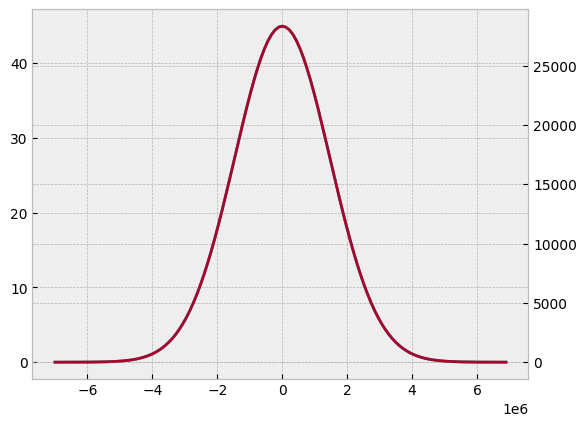

In [99]:
t = 10
plt.style.use('bmh')
plt.plot(
    zonal_velocity.y,
    zonal_velocity.isel(t=t, x=0)
)
plt.twinx()
plt.plot(
    column_temperature.y,
    column_temperature.isel(t=t, x=0),
    color=bmh_colors(2)
)

In [63]:
u_velocity['velocity'].t

<xarray.DataArray 't' (t: 60)>
array([      0.,   43000.,   86500.,  129500.,  173000.,  216000.,  259000.,
        302500.,  345500.,  389000.,  432000.,  475000.,  518500.,  561500.,
        605000.,  648000.,  691000.,  734500.,  777500.,  821000.,  864000.,
        907000.,  950500.,  993500., 1037000., 1080000., 1123000., 1166500.,
       1209500., 1253000., 1296000., 1339000., 1382500., 1425500., 1469000.,
       1512000., 1555000., 1598500., 1641500., 1685000., 1728000., 1771000.,
       1814500., 1857500., 1901000., 1944000., 1987000., 2030500., 2073500.,
       2117000., 2160000., 2203000., 2246500., 2289500., 2333000., 2376000.,
       2419000., 2462500., 2505500., 2549000.])
Coordinates:
    sim_time      (t) float64 0.0 4.3e+04 8.65e+04 ... 2.506e+06 2.549e+06
    wall_time     (t) float64 6.698 14.61 22.1 29.86 ... 426.2 433.8 441.2 448.7
    timestep      (t) float64 500.0 500.0 500.0 500.0 ... 500.0 500.0 500.0
    iteration     (t) int64 0 86 173 259 346 432 ... 4752 4838 4925 5011 5098
    write_number  (t) int64 1 2 3 4 5 6 7 8 9 10 ... 52 53 54 55 56 57 58 59 60
  * t             (t) float64 0.0 4.3e+04 8.65e+04 ... 2.506e+06 2.549e+06

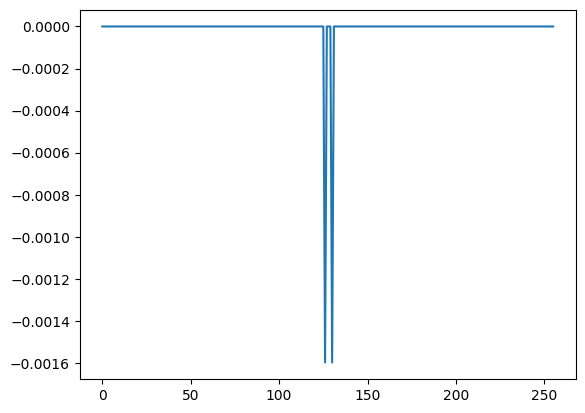

In [75]:
import numpy as np
# plt.pcolormesh(np.real(np.fft.fftshift(np.fft.fft(u_velocity['velocity'].isel(y=0)))))
plt.plot(np.real(np.fft.fftshift(np.fft.fft(u_velocity['velocity'].isel(t=50).isel(y=20)))))

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)

# Parameters
GRAVITY = 9.81                           # g [m/s^2]
EQUIVALENT_DEPTH = 250.                  # H [m]
CORIOLIS_PARAMETER = 2.29e-11            # ß [m^-1 s^-1]
EARTH_RADIUS = 6371.0072e3               # R_e [m]
AIR_DENSITY = 1.225                      # ρ_a [kg m^-3]
WATER_DENSITY = 997                      # ρ_w [kg m^-3]
LATENT_HEAT = 2260000                    # L_v [J kg^-1 K^-1]
SPECIFIC_HEAT = 1004                     # c_p [J kg^-1]
SECONDS_PER_DAY = 24*3600

zonal_domain_length = 2*np.pi*EARTH_RADIUS
meridional_domain_length = 14000e3
Nx = 256
Ny = 128
gravity_wave_phase_speed = np.sqrt(GRAVITY*EQUIVALENT_DEPTH)
length_scale = (gravity_wave_phase_speed/CORIOLIS_PARAMETER)**(1/2)

dealias = 3/2
stop_sim_time = 30*SECONDS_PER_DAY
timestepper = d3.RK222
timestep = 500
dtype = np.float64

total_iterations = stop_sim_time//timestep

CFL = gravity_wave_phase_speed*timestep/(zonal_domain_length/Nx)
print(f"CFL = {CFL:0.3f}")

# Bases
coords = d3.CartesianCoordinates('x', 'y')
dist = d3.Distributor(coords, dtype=dtype)
xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(0, zonal_domain_length), dealias=dealias)
ybasis = d3.RealFourier(coords['y'], size=Ny, bounds=(-meridional_domain_length/2, meridional_domain_length/2), dealias=dealias)

# Fields
u = dist.Field(name='u', bases=(xbasis, ybasis))

# Substitutions
dx = lambda A: d3.Differentiate(A, coords['x'])

# Problem
problem = d3.IVP([u], namespace=locals())
problem.add_equation("dt(u) + gravity_wave_phase_speed*dx(u) = 0")

# Initial Conditions
x, y = dist.local_grids(xbasis, ybasis)

u['g'] = np.cos(2*2*np.pi*x/zonal_domain_length) * np.exp(-(y/length_scale)**2)
    

# Solver
solver = problem.build_solver(timestepper)
solver.stop_sim_time = stop_sim_time

snapshots = solver.evaluator.add_file_handler('snapshots', sim_dt=0.5*SECONDS_PER_DAY, max_writes=total_iterations//8)
snapshots.add_task(u, name='velocity')


# plt.figure(figsize=(16,6))
# plt.pcolormesh(x.ravel(), np.array(t_list), np.array(u_list))
# plt.xlim(0, Lx)
# plt.ylim(0, stop_sim_time)
# plt.savefig('figures/2d_advection_example.png', dpi=300)



CFL = 0.158
2024-02-28 16:52:18,522 subsystems 0/1 INFO :: Building subproblem matrices 1/128 (~1%) Elapsed: 0s, Remaining: 2s, Rate: 6.4e+01/s
2024-02-28 16:52:18,686 subsystems 0/1 INFO :: Building subproblem matrices 13/128 (~10%) Elapsed: 0s, Remaining: 2s, Rate: 7.2e+01/s
2024-02-28 16:52:18,864 subsystems 0/1 INFO :: Building subproblem matrices 26/128 (~20%) Elapsed: 0s, Remaining: 1s, Rate: 7.3e+01/s
2024-02-28 16:52:19,041 subsystems 0/1 INFO :: Building subproblem matrices 39/128 (~30%) Elapsed: 1s, Remaining: 1s, Rate: 7.3e+01/s
2024-02-28 16:52:19,218 subsystems 0/1 INFO :: Building subproblem matrices 52/128 (~41%) Elapsed: 1s, Remaining: 1s, Rate: 7.3e+01/s
2024-02-28 16:52:19,396 subsystems 0/1 INFO :: Building subproblem matrices 65/128 (~51%) Elapsed: 1s, Remaining: 1s, Rate: 7.3e+01/s
2024-02-28 16:52:19,574 subsystems 0/1 INFO :: Building subproblem matrices 78/128 (~61%) Elapsed: 1s, Remaining: 1s, Rate: 7.3e+01/s
2024-02-28 16:52:19,751 subsystems 0/1 INFO :: Build

In [50]:
# Main loop
try: 
    logger.info("Starting main loop")
    while solver.proceed:
        solver.step(timestep)
        if solver.iteration % 100 == 0:
            logger.info(
                f"Iteration={solver.iteration}/{total_iterations}, "
                + f"Time={solver.sim_time/SECONDS_PER_DAY:0.2f}/{stop_sim_time/SECONDS_PER_DAY} days, "
                + f"dt={timestep} sec"
            )
except:
    logger.error('Exception raised, triggering end of main loop')
    raise
finally:
    solver.log_stats()

2024-02-28 16:52:34,059 __main__ 0/1 INFO :: Iteration=100/5184, Time=0.58/30.0,dt=500 s
2024-02-28 16:52:43,037 __main__ 0/1 INFO :: Iteration=200/5184, Time=1.16/30.0,dt=500 s
2024-02-28 16:52:51,567 __main__ 0/1 INFO :: Iteration=300/5184, Time=1.74/30.0,dt=500 s
2024-02-28 16:53:00,099 __main__ 0/1 INFO :: Iteration=400/5184, Time=2.31/30.0,dt=500 s
2024-02-28 16:53:08,525 __main__ 0/1 INFO :: Iteration=500/5184, Time=2.89/30.0,dt=500 s
2024-02-28 16:53:16,988 __main__ 0/1 INFO :: Iteration=600/5184, Time=3.47/30.0,dt=500 s
2024-02-28 16:53:25,508 __main__ 0/1 INFO :: Iteration=700/5184, Time=4.05/30.0,dt=500 s
2024-02-28 16:53:33,427 __main__ 0/1 INFO :: Iteration=800/5184, Time=4.63/30.0,dt=500 s
2024-02-28 16:53:42,101 __main__ 0/1 INFO :: Iteration=900/5184, Time=5.21/30.0,dt=500 s
2024-02-28 16:53:50,752 __main__ 0/1 INFO :: Iteration=1000/5184, Time=5.79/30.0,dt=500 s
2024-02-28 16:53:59,432 __main__ 0/1 INFO :: Iteration=1100/5184, Time=6.37/30.0,dt=500 s
2024-02-28 16:54:08